In [9]:
import cn_utils
import Poetry

import numpy as np
import matplotlib.pyplot as plt

from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.rnn_layers import *
from cs231n.captioning_solver import CaptioningSolver
from cs231n.classifiers.rnn import CaptioningRNN
from cs231n.coco_utils import load_coco_data, sample_coco_minibatch, decode_captions
from cs231n.image_utils import image_from_url
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
poetries = cn_utils.readFile('./poetry')

word_to_idx, idx_to_word = cn_utils.get_idx_and_words(poetries)

#encodec_poetry = cn_utils.encodePoetry(poetries[0],word_to_idx)

#decoded_poetry = cn_utils.decodePoetry(encodec_poetry,idx_to_word)


all files:
['\xe5\x85\xab\xe9\x98\xb5\xe5\x9b\xbe.txt', '\xe5\x85\xb3\xe5\xb1\xb1\xe6\x9c\x88.txt', '\xe5\xbc\xb9\xe7\x90\xb4.txt', '\xe6\x98\xa5\xe6\x99\x93.txt', '\xe6\x9d\x82\xe8\xaf\x97.txt', '\xe6\xb1\x9f\xe9\x9b\xaa.txt', '\xe6\xb8\xb8\xe5\xad\x90\xe5\x90\x9f.txt', '\xe7\x99\xbb\xe4\xb9\x90\xe6\xb8\xb8\xe5\x8e\x9f.txt', '\xe7\x99\xbb\xe9\xb9\xb3\xe9\x9b\x80\xe6\xa5\xbc.txt', '\xe7\x9b\xb8\xe6\x80\x9d.txt', '\xe7\xbb\x88\xe5\x8d\x97\xe6\x9c\x9b\xe4\xbd\x99\xe9\x9b\xaa.txt', '\xe8\x8d\x89.txt', '\xe9\x9d\x99\xe5\xa4\x9c\xe6\x80\x9d.txt', '\xe9\xb9\xbf\xe6\x9f\xb4.txt']
reading file:  ./poetry/八阵图.txt
八阵图
stt功盖三分国，名成八阵图。江流石不转，遣恨失吞吴。end
----- reading finished -----


reading file:  ./poetry/关山月.txt
关山月
stt明月出天山，苍茫云海间。长风几万里，吹度玉门关。汉下白登道，胡窥青海湾。由来征战地，不见有人还。戍客望边色，思归多苦颜。高楼当此夜，叹息未应闲。end
----- reading finished -----


reading file:  ./poetry/弹琴.txt
弹琴
stt泠泠七弦上，静听松风寒。古调虽自爱，今人多不弹。end
----- reading finished -----


reading file:  ./poetry/春晓.txt
春晓
stt春眠不觉晓，处处闻啼鸟。夜来风雨声，花落知多少。end
----- reading f

In [11]:
encoded_poetries = []
for pt in poetries:
    encoded_poetries.append(cn_utils.encodePoetry(pt, word_to_idx))

In [15]:
import poetry_utils
data = {}
data = poetry_utils.generate_data(encoded_poetries, data)

poetry_utils._generate_feature: [ 3.  4.  5.  0.  3.  4.  5.  0.  3.  4.  5.  0.  3.  4.  5.  0.  3.  4.
  5.  0.]
poetry_utils._generate_feature: [ 25.  26.  27.   0.  25.  26.  27.   0.  25.  26.  27.   0.  25.  26.  27.
   0.  25.  26.  27.   0.]
poetry_utils._generate_feature: [ 83.  84.   0.  83.  84.   0.  83.  84.   0.  83.  84.   0.  83.  84.   0.
  83.  84.   0.   0.   0.]
poetry_utils._generate_feature: [  99.  100.    0.   99.  100.    0.   99.  100.    0.   99.  100.    0.
   99.  100.    0.   99.  100.    0.    0.    0.]
poetry_utils._generate_feature: [ 113.  114.    0.  113.  114.    0.  113.  114.    0.  113.  114.    0.
  113.  114.    0.  113.  114.    0.    0.    0.]
poetry_utils._generate_feature: [  15.  125.    0.   15.  125.    0.   15.  125.    0.   15.  125.    0.
   15.  125.    0.   15.  125.    0.    0.    0.]
poetry_utils._generate_feature: [ 139.  140.  141.    0.  139.  140.  141.    0.  139.  140.  141.    0.
  139.  140.  141.    0.  139.  140.  141.   

Automatic pdb calling has been turned ON
(14, 20) (14, 100)
(Iteration 1 / 300) loss: 163.365628
(Iteration 11 / 300) loss: 155.799275
(Iteration 21 / 300) loss: 113.500866
(Iteration 31 / 300) loss: 88.806249
(Iteration 41 / 300) loss: 62.233978
(Iteration 51 / 300) loss: 51.807036
(Iteration 61 / 300) loss: 43.871203
(Iteration 71 / 300) loss: 45.649907
(Iteration 81 / 300) loss: 44.335423
(Iteration 91 / 300) loss: 33.296370
(Iteration 101 / 300) loss: 37.913958
(Iteration 111 / 300) loss: 35.886527
(Iteration 121 / 300) loss: 31.000849
(Iteration 131 / 300) loss: 33.335544
(Iteration 141 / 300) loss: 34.600224
(Iteration 151 / 300) loss: 32.479371
(Iteration 161 / 300) loss: 31.078577
(Iteration 171 / 300) loss: 32.063398
(Iteration 181 / 300) loss: 36.122978
(Iteration 191 / 300) loss: 33.730081
(Iteration 201 / 300) loss: 30.658733
(Iteration 211 / 300) loss: 35.470142
(Iteration 221 / 300) loss: 33.412269
(Iteration 231 / 300) loss: 37.168645
(Iteration 241 / 300) loss: 36.74631

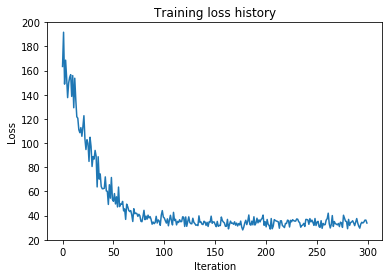

In [20]:
%pdb on
small_data = data
print data['train_features'].shape,data['train_captions'].shape
small_rnn_model = CaptioningRNN(
          cell_type='lstm',
          word_to_idx=word_to_idx,
          input_dim=data['train_features'].shape[1],
          hidden_dim=512,
          wordvec_dim=256,
        )

small_rnn_solver = CaptioningSolver(small_rnn_model, small_data,
           update_rule='adam',
           num_epochs=300,
           batch_size=25,
           optim_config={
             'learning_rate': 5e-3,
           },
           lr_decay=0.95,
           verbose=True, print_every=10,
         )

small_rnn_solver.train()

# Plot the training losses
plt.plot(small_rnn_solver.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()

# 这一段是用来测试新给定的题目来生成古诗的情况

In [24]:
wuti = small_rnn_model.sample(np.ones((1,20)) * 0)

In [25]:
wuti_cn = cn_utils.decodeChinese(wuti[0], idx_to_word)

In [26]:
print wuti_cn

stt南国，寒。endend征战，，叹有人还。end客望边色，思归多苦颜。高


In [27]:
import poetry_utils

In [48]:
wisdom_title = '八阵图'
wisdom = small_rnn_model.sample(poetry_utils.title_to_feature(wisdom_title, word_to_idx))

In [49]:
print poetry_utils.title_to_feature(wisdom_title, word_to_idx)
print cn_utils.decodeChinese(wisdom[0], idx_to_word)

[[ 3.  4.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]
stt明月山，，茫云海间。长风密里，，遣恨失吞吴。endend征战，，见


# 下面是用来测试对数据集的拟合情况的

In [21]:
sample_captions = small_rnn_model.sample(data['train_features'],max_length=50)

In [34]:
for i in xrange(len(sample_captions)):
    first = cn_utils.decodeChinese(sample_captions[i], idx_to_word)

    print cn_utils.decodeChinese(data['train_features'][i].astype(int), idx_to_word), '\n', first


八阵图blk八阵图blk八阵图blk八阵图blk八阵图blk 
stt功盖三分国，名成八阵图。江流石不不，遣恨失吞吴。endend征战，道，有有人还。end客望边色，思归归。end高楼
关山月blk关山月blk关山月blk关山月blk关山月blk 
stt功盖三分国，名成八阵图。江流石不转，遣恨失吞吴。endend征战，道，叹有有还。end客望边色，思归归。end高楼
弹琴blk弹琴blk弹琴blk弹琴blk弹琴blk弹琴blkblkblk 
stt空山不见，人处闻闻语响。返影深林，复照照青上。endendendend，吹白道，叹归。end楼。end当，道，胡窥海海湾。
春晓blk春晓blk春晓blk春晓blk春晓blk春晓blkblkblk 
stt空山不见，人处闻闻语响。返影深林，复照照青上。endendendend，吹白道，叹归。end楼。end当，道，胡窥海海湾。
杂诗blk杂诗blk杂诗blk杂诗blk杂诗blk杂诗blkblkblk 
stt空山不见，人处闻闻语响。返影深林，复照照青上。endendendend，吹白道，叹归。end楼。end当，道，胡窥海海湾。
江雪blk江雪blk江雪blk江雪blk江雪blk江雪blkblkblk 
stt千山鸟飞绝，万径人踪灭。孤舟蓑笠翁，独钓寒寒。endend望边，叹叹息归归。end楼当当此，叹息未未。endend征战
游子吟blk游子吟blk游子吟blk游子吟blk游子吟blk 
stt床前明月光，疑是地上上。举头望明月，低头思故乡。endend，，，，叹息应应闲。endend征战，叹息息应应闲。end
登乐游原blk登乐游原blk登乐游原blk登乐游原blk 
stt向晚意不适，驱车登古原。夕阳无限好，只是近黄昏。endend望，战，晴翠翠翠城。end客望色，，息归应。end高楼
登鹳雀楼blk登鹳雀楼blk登鹳雀楼blk登鹳雀楼blk 
stt白日依山尽，黄河入海流。欲穷里里，更上一层楼。endend征征，道，报报翠春春。end客望边，，叹息归应。end高
相思blk相思blk相思blk相思blk相思blk相思blkblkblk 
stt红豆生南国，春来发几。来来来采，，此落知多多。endendend，此此叹叹息未。end楼。end当，叹叹息息未。endend楼
终南望余雪blk终南望余雪blk终南望余雪b